<a href="https://colab.research.google.com/github/oddsmile/GAcustomerprediction/blob/main/4%2C6%2C%EC%BA%A0%ED%8E%98%EC%9D%B8%EB%B3%84%20%EA%B5%AC%EB%A7%A4%EC%A0%84%ED%99%98%EC%9C%A8(%EB%AF%B8%EA%B5%AD%EA%B8%B0%EC%A4%80).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# 데이터 로드
# 'your_data.csv'는 실제 데이터 파일의 경로와 이름으로 교체해야합니다.
df = pd.read_csv('/content/preproccessed_df.csv')

# 'utc_time' 컬럼을 datetime 타입으로 변환
df['utc_time'] = pd.to_datetime(df['utc_time'])

# 'utc_time' 컬럼에서 날짜 부분만 추출하여 'date' 컬럼을 생성
df['date'] = df['utc_time'].dt.date

# 'date'와 'country' 그리고 'fullVisitorId'를 기준으로 중복 제거
df_dau = df.drop_duplicates(subset=['date', 'country', 'fullVisitorId'])

# 'date'와 'country'를 기준으로 DAU 계산
dau_by_country = df_dau.groupby(['date', 'country']).size().reset_index(name='DAU')

# 국가별로 DAU 합계 계산
total_dau_by_country = dau_by_country.groupby('country')['DAU'].sum().reset_index()

# DAU 합계가 높은 순으로 정렬하고 상위 10개 국가 출력
top_10_countries = total_dau_by_country.sort_values(by='DAU', ascending=False).head(10).reset_index(drop=True)

print(top_10_countries)

<ipython-input-3-c228577b2732>:5: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/preproccessed_df.csv')


          country     DAU
0   United States  191483
1           India   28242
2  United Kingdom   20394
3         Vietnam   16743
4          Canada   13813
5        Thailand   13257
6          Turkey   12757
7          Brazil   12144
8         Germany   10926
9           Japan   10543


국가별 DAU 평균을 Folium으로 시각화하기

In [ ]:
import folium

# 위도와 경도 정보 추가
top_10_countries['latitude'] = [37.0902, 20.5937, 55.3781, 14.0583, 56.1304, 15.8700, 38.9637, -14.2350, 51.1657, 36.2048]
top_10_countries['longitude'] = [-95.7129, 78.9629, -3.4360, 108.2772, -106.3468, 100.9925, 35.2433, -51.9253, 10.4515, 138.2529]

# 지도 생성, location 파라미터는 초기 지도의 중심 좌표를 설정하고, zoom_start 파라미터는 초기 확대 레벨을 설정
world_map = folium.Map(location=[0, 0], zoom_start=2)

# 각 국가를 지도에 표시
for i in range(len(top_10_countries)):
    folium.CircleMarker(
        location=[top_10_countries.at[i, 'latitude'], top_10_countries.at[i, 'longitude']],
        radius=top_10_countries.at[i, 'DAU'] / 1000,  # Adjust this value to properly scale the size of the marker
        color="blue",
        fill=True,
        fill_color="blue",
        popup=folium.Popup(top_10_countries.at[i, 'country'], parse_html=True)  # Add country name popup
    ).add_to(world_map)

# 지도 출력
world_map

요일/시간대별 사용자 수를 구하고 이를 heatmap으로 시각화 (United States 기준)

<ipython-input-2-9a3026b0c6f5>:6: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/preproccessed_df.csv', parse_dates=['utc_time'])


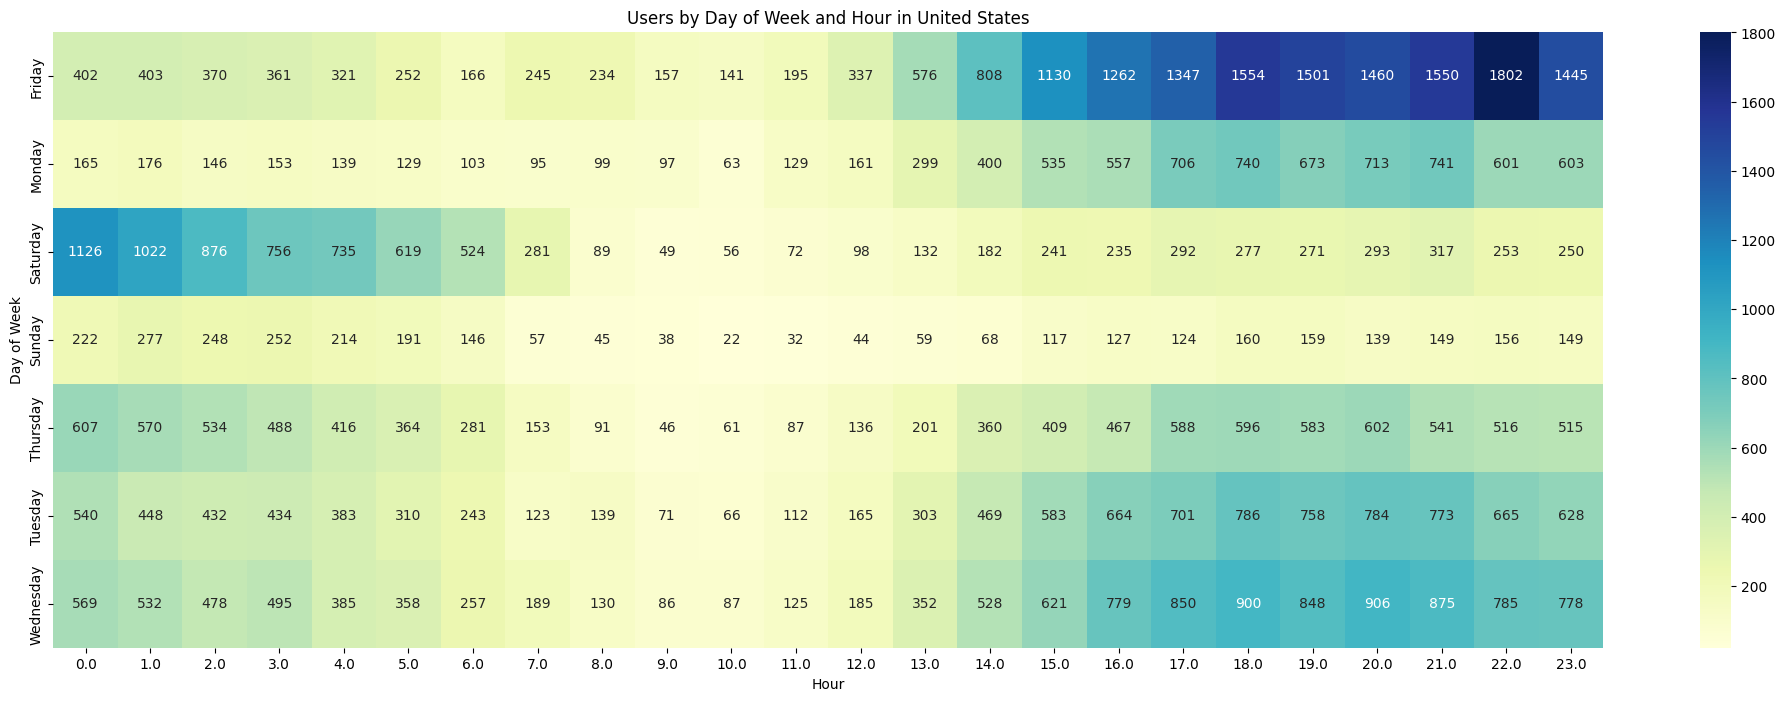

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 로드
df = pd.read_csv('/content/preproccessed_df.csv', parse_dates=['utc_time'])

# United States 데이터만 선택
df = df[df['country'] == 'United States']

# 요일 및 시간대 추출
df['day_of_week'] = df['utc_time'].dt.day_name()
df['hour'] = df['utc_time'].dt.hour

# 요일/시간대별 사용자 수 계산
heatmap_data = df.groupby(['day_of_week', 'hour']).size().unstack(fill_value=0)

# heatmap으로 시각화
plt.figure(figsize=(25, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Users by Day of Week and Hour in United States')
plt.xlabel('Hour')
plt.ylabel('Day of Week')
plt.show()

캠페인별 구매 전환율 (United States 기준)

In [ ]:
import pandas as pd

# 데이터 로드
df = pd.read_csv('/content/preproccessed_df.csv', parse_dates=['utc_time'])

# United States 데이터만 선택
df_us = df[df['country'] == 'United States']

# 캠페인별 구매 완료 방문 수 계산
# 'transactionRevenue' 열이 0보다 큰 행을 선택하고
# 이를 'campaign' 기준으로 그룹화하여 각 그룹의 크기를 계산
purchase_visits = df_us[df_us['transactionRevenue'] > 0].groupby('campaign').size()

# 캠페인별 총 방문 수 계산
total_visits = df_us.groupby('campaign').size()

# 캠페인별 구매 전환율 계산 및 반올림
conversion_rate = (purchase_visits / total_visits).round(4)

# 캠페인별 구매 전환율을 퍼센트로 계산
conversion_rate_percent = conversion_rate * 100

# 결과 출력
print(conversion_rate_percent)

#AW: Google AdWords (아마도)

<ipython-input-8-f5c51d37e102>:4: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/preproccessed_df.csv', parse_dates=['utc_time'])


campaign
(not set)                                          3.08
AW - Accessories                                   1.93
AW - Apparel                                       2.27
AW - Dynamic Search Ads Whole Site                 2.32
AW - Electronics                                    NaN
All Products                                        NaN
Data Share                                          NaN
Data Share Promo                                   0.25
Retail (DO NOT EDIT owners nophakun and tianyu)    2.00
test-liyuhz                                        1.10
dtype: float64
